# Importing the sql database into jupyter and establishing connection

In [216]:
import sqlite3
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
path = r"C:\Users\alexl\csv_sql.db"
conn = sqlite3.connect(path)
query = "SELECT name FROM sqlite_master WHERE type='table';"
df_tables = pd.read_sql_query(query, conn)
print("Tables in the database:", df_tables)

## loading a specific table from the database into a dataframe
table_name = 'FACTsales'
df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
print(df.head())



Tables in the database:                        name
0                 FACTsales
1              DimCalendars
2           sqlite_sequence
3      DimProductCategories
4  DimProduct_Subcategories
5               DimProducts
6            DimTerritories
7                FACTReturn
8               DimCustomer
  OrderDate   StockDate OrderNumber  ProductKey  CustomerKey  TerritoryKey  \
0  1/1/2017  12/13/2003     SO61285         529        23791             1   
1  1/1/2017   9/24/2003     SO61285         214        23791             1   
2  1/1/2017    9/4/2003     SO61285         540        23791             1   
3  1/1/2017   9/28/2003     SO61301         529        16747             1   
4  1/1/2017  10/21/2003     SO61301         377        16747             1   

   OrderLineItem  OrderQuantity  
0              2              2  
1              3              1  
2              1              1  
3              2              2  
4              1              1  


## Loading data into a dataframe

In [217]:
### these queries loads the the table from the sql database tabes into the pandas dataframe

def query_to_dataframe(query):
    return pd.read_sql_query(query, conn)

FS_df = query_to_dataframe("select * from FACTsales")
FR_df = query_to_dataframe("select * from FACTReturn")
DP_df = query_to_dataframe("select * from DimProducts")
DT_df = query_to_dataframe("select * from DimTerritories")
DCAL_df = query_to_dataframe("select * from  DimCalendars")
DCU_df = query_to_dataframe("select * from  DimCustomer")
DPC_df = query_to_dataframe("select * from  DimProductCategories")
DPSC_df = query_to_dataframe("select * from  DimProduct_Subcategories")

print("data was suscessfully loaded into Dataframe.")

data was suscessfully loaded into Dataframe.


### Data Preprocessing steps

In [218]:
FS_df.head()

,OrderDate,StockDate,OrderNumber,ProductKey,CustomerKey,TerritoryKey,OrderLineItem,OrderQuantity
0,1/1/2017,12/13/2003,SO61285,529,23791,1,2,2
1,1/1/2017,9/24/2003,SO61285,214,23791,1,3,1
2,1/1/2017,9/4/2003,SO61285,540,23791,1,1,1
3,1/1/2017,9/28/2003,SO61301,529,16747,1,2,2
4,1/1/2017,10/21/2003,SO61301,377,16747,1,1,1


In [219]:
FR_df.head()

,ReturnIndex,ReturnDate,TerritoryKey,ProductKey,ReturnQuantity
0,1,1/18/2015,9,312,1
1,2,1/18/2015,10,310,1
2,3,1/21/2015,8,346,1
3,4,1/22/2015,4,311,1
4,5,2/2/2015,6,312,1


In [220]:
## checking for isnull values in the dataframe

FS_df.isnull().sum()

OrderDate        0
StockDate        0
OrderNumber      0
ProductKey       0
CustomerKey      0
TerritoryKey     0
OrderLineItem    0
OrderQuantity    0
dtype: int64

In [221]:
FS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29481 entries, 0 to 29480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      29481 non-null  object
 1   StockDate      29481 non-null  object
 2   OrderNumber    29481 non-null  object
 3   ProductKey     29481 non-null  int64 
 4   CustomerKey    29481 non-null  int64 
 5   TerritoryKey   29481 non-null  int64 
 6   OrderLineItem  29481 non-null  int64 
 7   OrderQuantity  29481 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.8+ MB


In [222]:
DCU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18148 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


## Ensuring that the columns have the appropriate data types

In [223]:
### converting the string columns to a datetime data type

FS_df['OrderDate'] = pd.to_datetime(FS_df['OrderDate'], errors='coerce')
FS_df['StockDate'] = pd.to_datetime(FS_df['StockDate'], errors='coerce')
DCAL_df['OrderDate'] = pd.to_datetime(DCAL_df['OrderDate'], errors='coerce')

## Ensuring that numerical columns are properly typed

FS_df['OrderQuantity'] = pd.to_numeric(FS_df['OrderQuantity'], errors='coerce').astype(int)
FR_df['ReturnQuantity'] = pd.to_numeric(FR_df['ReturnQuantity'], errors='coerce').astype(int)


In [224]:
## Confirming that the datatype has changed

FS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29481 entries, 0 to 29480
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderDate      29481 non-null  datetime64[ns]
 1   StockDate      29481 non-null  datetime64[ns]
 2   OrderNumber    29481 non-null  object        
 3   ProductKey     29481 non-null  int64         
 4   CustomerKey    29481 non-null  int64         
 5   TerritoryKey   29481 non-null  int64         
 6   OrderLineItem  29481 non-null  int64         
 7   OrderQuantity  29481 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(4), object(1)
memory usage: 1.7+ MB


In [225]:
FR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ReturnIndex     1809 non-null   int64 
 1   ReturnDate      1809 non-null   object
 2   TerritoryKey    1809 non-null   object
 3   ProductKey      1809 non-null   object
 4   ReturnQuantity  1809 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 63.7+ KB


## Referential Integrity

In [226]:
## check for valid productkey in the products table which connects to the factsales table

invalid_product_keys = FS_df[~FS_df['ProductKey']. isin(DP_df['ProductKey'])]
if not invalid_product_keys.empty:
    print("invalid product key references found in FS_df ")

## check for valid customerkey references in customers

invalid_customer_keys = FS_df[~FS_df['CustomerKey']. isin(DCU_df['CustomerKey'])]
if not invalid_customer_keys.empty:
    print("invalid customer key references found in FS_df ")

In [227]:
DCU_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerKey     18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18148 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  object
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.8+ MB


In [228]:
DCU_df.head()

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y


In [229]:
DP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProductKey             293 non-null    int64  
 1   ProductSubcategoryKey  293 non-null    int64  
 2   ProductSKU             293 non-null    object 
 3   ProductName            293 non-null    object 
 4   ModelName              293 non-null    object 
 5   ProductDescription     293 non-null    object 
 6   ProductColor           293 non-null    object 
 7   ProductSize            293 non-null    object 
 8   ProductStyle           293 non-null    object 
 9   ProductCost            293 non-null    float64
 10  ProductPrice           293 non-null    float64
dtypes: float64(2), int64(2), object(7)
memory usage: 25.3+ KB


## Visualizing Outliers

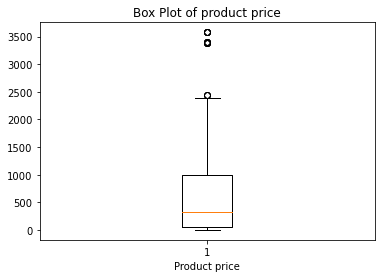

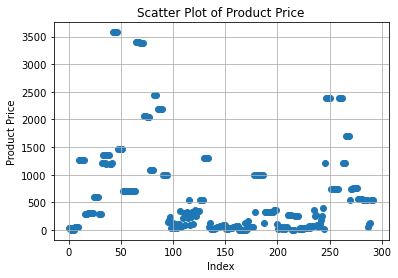

In [230]:

# Boxplot for productprice to visualize outliers
plt.figure(figsize=(6,4))
plt.boxplot(DP_df['ProductPrice'].dropna())
plt.title('Box Plot of product price')
plt.xlabel('Product price')
plt.show()


plt.figure(figsize=(6, 4))
# Scatter plot with the index of the DataFrame as x-axis and ProductPrice as y-axis
plt.scatter(DP_df.index, DP_df['ProductPrice'].dropna())
plt.title('Scatter Plot of Product Price')
plt.xlabel('Index')
plt.ylabel('Product Price')
plt.grid(True)  # Add grid lines for better readability
plt.show()

## Removing the outliers

In [215]:
def remove_outliers_iqr(df, column): #This function removes outliers from a specified column in a DataFrame using the Interquartile Range (IQR) method.
    Q1 =df[column].quantile(0.25) #Calculate the first quartile (Q1), which is the 25th percentile of the data in the specified column.
    Q3 =df[column].quantile(0.75) #Calculate the third quartile (Q3), which is the 75th percentile of the data in the specified column.
    IQR =Q3-Q1 #Calculate the Interquartile Range (IQR). IQR is the range between Q1 and Q3, capturing the middle 50% of the data.
    lower_bound =Q1 -1.5 * IQR #defines the upper and lower bounds, any number lower or higher than these lower and upper bound will be considered an outlier.
    upper_bound =Q3 + 1.5 * IQR
    
    #filters off the outliers
    filtered_df =df[(df[column]>= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"Removed {len(df) - len(filtered_df)} outliers from {column}.")
    return filtered_df

# removing the outliers
DP_df_clean = remove_outliers_iqr(DP_df, "ProductPrice")



Removed 16 outliers from ProductPrice.
